In [1]:
import warnings

warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore")

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import rfft, rfftfreq, irfft
from scipy.signal import convolve

1. Реализовать усреднение зашумленного сигнала по формуле\
$y_t = (2k+1)^{-1} \sum \limits_{i=t-k}^{t+k} x_i$.\
(Это эквивалентно свертке с ядром из $2k+1$ единиц)

Вывести спектр усредненного и зашумленного сигнала.


In [8]:
def add_noise(signal, noise_level=1):
    '''
    Добавление к сигналу гауссовского шума 
    '''
    return signal + np.random.normal(0, noise_level, signal.shape)

def cos_signal(t, f, A=1):
    '''
    Функция возвращает значение косинусоидального сигнала в заданный момент времени t.
    t - время, f - список частот сигнала, A - амплитуда сигнала.
    '''
    y = 0
    for i in f:
        w = 2 * np.pi * i
        y += A * np.cos(w * t)
    return y

num = 50000  # количество отсчетов
f = [2, 10, 20, 35, 150]

# создание сигнала
t = np.linspace(0, 1, num)
y = cos_signal(t, f, A=0.2)
np.random.seed(40)
y_noised = add_noise(y, 1)

# fft
freq = rfftfreq(len(t), d=(t[1]-t[0]))
yff_signal = rfft(y_noised)

In [7]:
def mean_smooth(y, k=0):
    y_smoothed = convolve(y, np.ones(2*k+1), mode='same') / (2*k+1)
    yff_smoothed = rfft(y_smoothed)
    return y_smoothed, yff_smoothed

y_smoothed, yff_smoothed = mean_smooth(y_noised)

2. Реализовать усреднение зашумленного сигнала по формуле\
$y_t = \sum \limits_{i=t-k}^{t+k} x_i$,\
$g=e^{\frac{-4ln(2)t^2}{\omega^2}}$\
(Это эквивалентно свертке с Гауссовским ядром шириной $2k+1$).

Вывести спектр усредненного и зашумленного сигнала. Сопоставить усреднение по
Гауссу и среднему значению.

In [5]:
def gaus_smooth(y, omega=10, k=0):
    omega = 10 # параметр Гауссова ядра
    window_len = 2*k+1

    # Создаем Гауссово ядро
    t_g = np.arange(window_len) - k
    gauss_kernel = np.exp(-4*np.log(2)*t_g**2 / omega**2)
    gauss_kernel /= gauss_kernel.sum() # нормализуем ядро

    y_smoothed = convolve(y, gauss_kernel, mode='same')
    yff_smoothed = rfft(y_smoothed)
    return y_smoothed, yff_smoothed
    
y_smoothed2, yff_smoothed2 = gaus_smooth(y_noised)

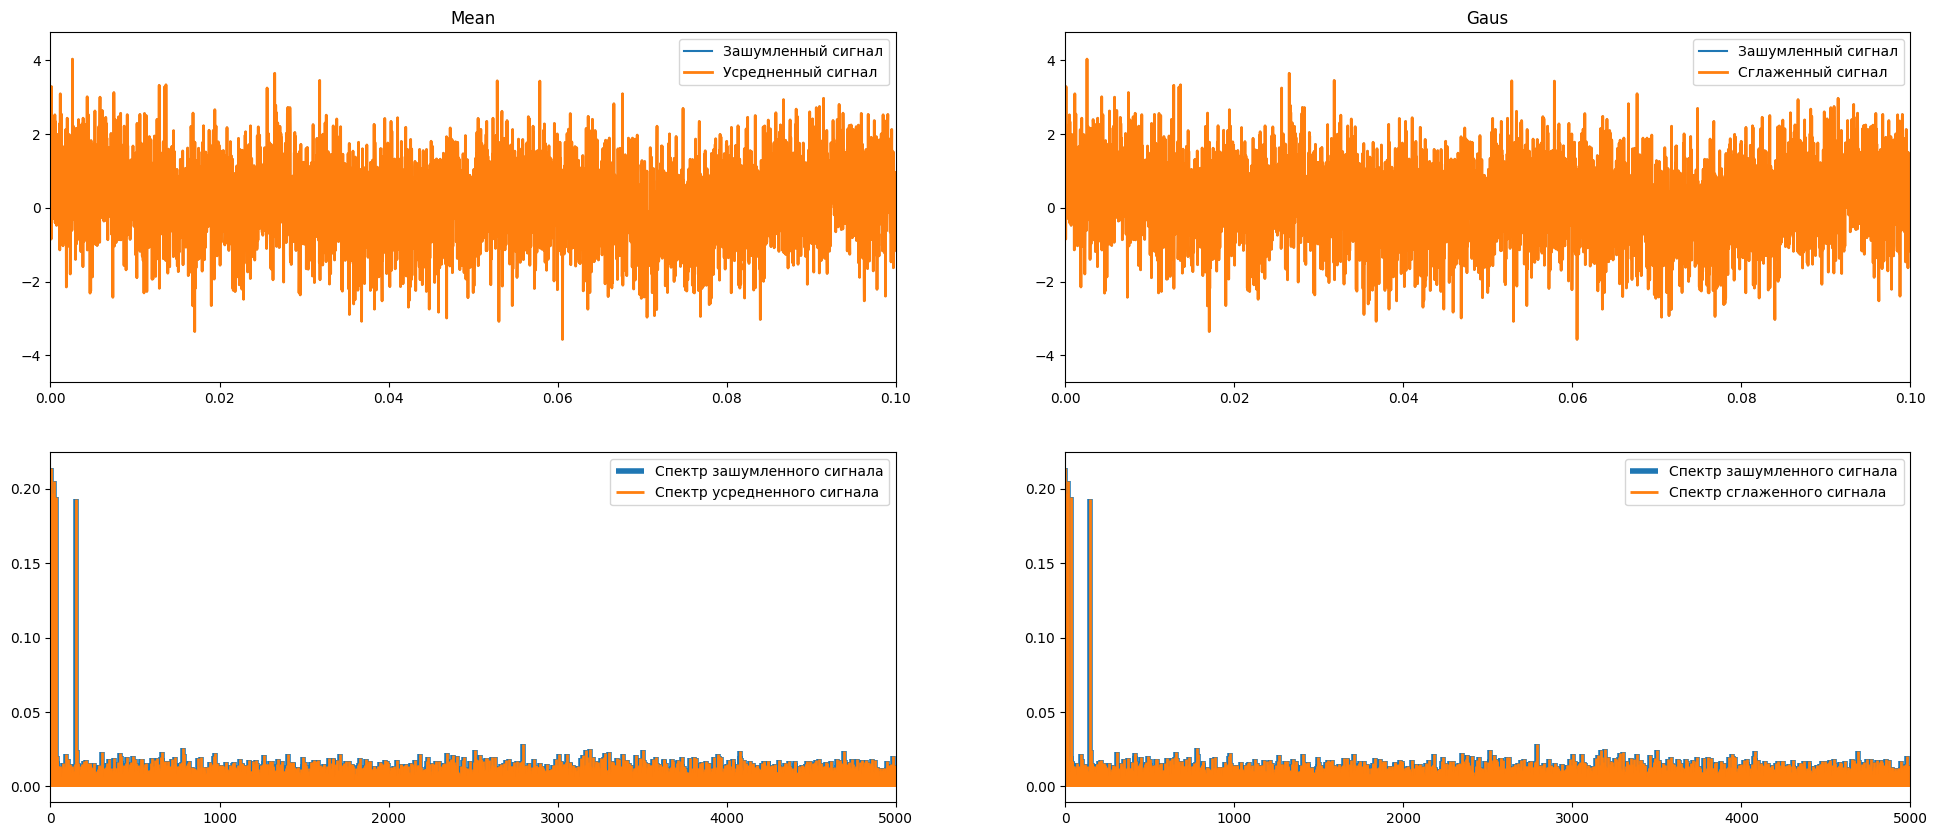

In [9]:
# Вывод результатов
plt.figure(figsize=(24, 10))

plt.subplot(2, 2, 1)
plt.title("Mean")
plt.plot(t, y_noised, label='Зашумленный сигнал')
plt.plot(t, y_smoothed, linewidth=2, label='Усредненный сигнал')
plt.xlim(0, 0.1)
plt.legend()

plt.subplot(2, 2, 3)
plt.vlines(freq, 0, np.abs(yff_signal) / num * 2, label='Спектр зашумленного сигнала', linewidth=4, color='C0')
plt.vlines(freq, 0, np.abs(yff_smoothed) / num * 2, label='Спектр усредненного сигнала', linewidth=2, color='C1')
plt.xlim(0, 5000)
plt.legend()

plt.subplot(2, 2, 2)
plt.title("Gaus")
plt.plot(t, y_noised, label='Зашумленный сигнал')
plt.plot(t, y_smoothed2, linewidth=2, label='Сглаженный сигнал')
plt.xlim(0, 0.1)
plt.legend()

plt.subplot(2, 2, 4)
plt.vlines(freq, 0, np.abs(yff_signal) / num * 2, label='Спектр зашумленного сигнала', linewidth=4, color='C0')
plt.vlines(freq, 0, np.abs(yff_smoothed2) / num * 2, label='Спектр сглаженного сигнала', linewidth=2, color='C1')
plt.xlim(0, 5000)
plt.legend()

plt.show()

3. Воспользоваться усреднением по Гауссу для обработки сигнала, состоящего из всплесков пиков.
Всплеск каждого пика является случайно величиной. Амплитуда каждого пика A=1 V.

In [11]:
def add_spikes(signal, num_spikes, A=1, random_amplitude=False):
    # Копируем исходный сигнал, чтобы не изменять его
    signal_with_spikes = np.copy(signal)
    
    # Генерируем случайные индексы для пиков
    spike_indices = np.random.randint(0, len(signal), num_spikes)
    
    if random_amplitude:
        # Генерируем случайные амплитуды для каждого пика
        amplitudes = np.random.uniform(0, A, num_spikes)
        signal_with_spikes[spike_indices] += amplitudes
    else:
        # Добавляем пики с амплитудой A
        signal_with_spikes[spike_indices] += A
    
    return signal_with_spikes


In [12]:
y_spiked3 = add_spikes(y, num//200, 1)
yff_signal3 = rfft(y_spiked3)
y_smoothed3, yff_smoothed3 = gaus_smooth(y_spiked3, omega=100, k=20)

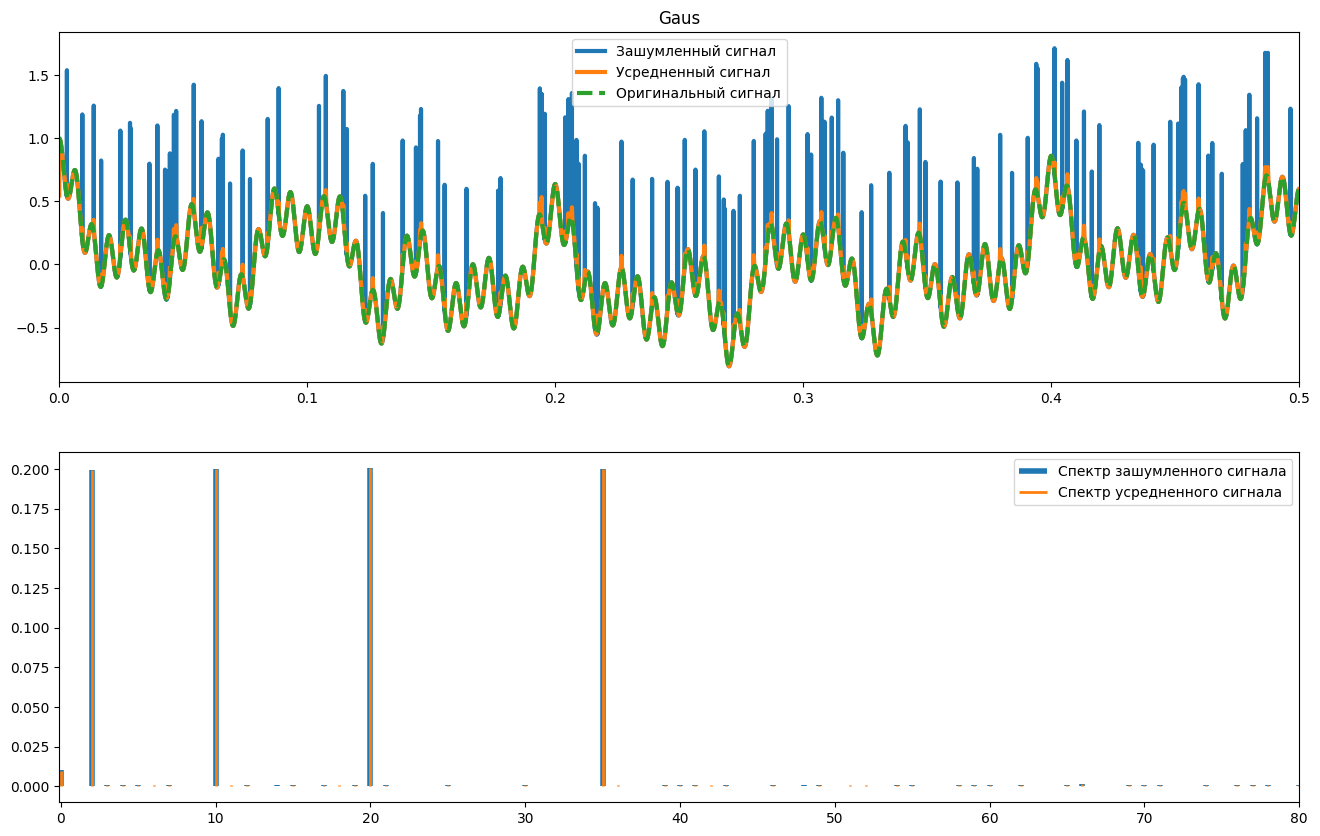

In [13]:
# Вывод результатов
plt.figure(figsize=(16, 10))

plt.subplot(2, 1, 1)
plt.title("Gaus")
plt.plot(t, y_spiked3, linewidth=3,label='Зашумленный сигнал')
plt.plot(t, y_smoothed3, linewidth=3, label='Усредненный сигнал')
plt.plot(t, y, linewidth=3, linestyle='--', label='Оригинальный сигнал')
plt.xlim(0, 0.5)
plt.legend()

plt.subplot(2, 1, 2)
plt.vlines(freq, 0, np.abs(yff_signal3) / num * 2, label='Спектр зашумленного сигнала', linewidth=4, color='C0')
plt.vlines(freq, 0, np.abs(yff_smoothed3) / num * 2, label='Спектр усредненного сигнала', linewidth=2, color='C1')
plt.xlim(-0.1, 80)
plt.legend()

plt.show()

4. Реализовать медианный фильтр для очистки сигнала от случайных всплесков в сигнала. В этом
случае амплитуда всплеска сигнала уже не является постоянной и является случайной величиной.

In [14]:
def median_smooth(y, k=10):
    # Создаем пустой массив для сглаженного сигнала
    y_smoothed = np.zeros_like(y)

    # Применяем медианный фильтр
    for i in range(len(y)):
        start = max(0, i - k)
        end = min(len(y), i + k + 1)
        y_smoothed[i] = np.median(y[start:end])

    yff_smoothed = rfft(y_smoothed)

    return y_smoothed, yff_smoothed

y_spiked4 = add_spikes(y, num//20, 2, random_amplitude=True)
yff_signal4 = rfft(y_spiked4)
y_smoothed4, yff_smoothed4 = median_smooth(y_spiked4)


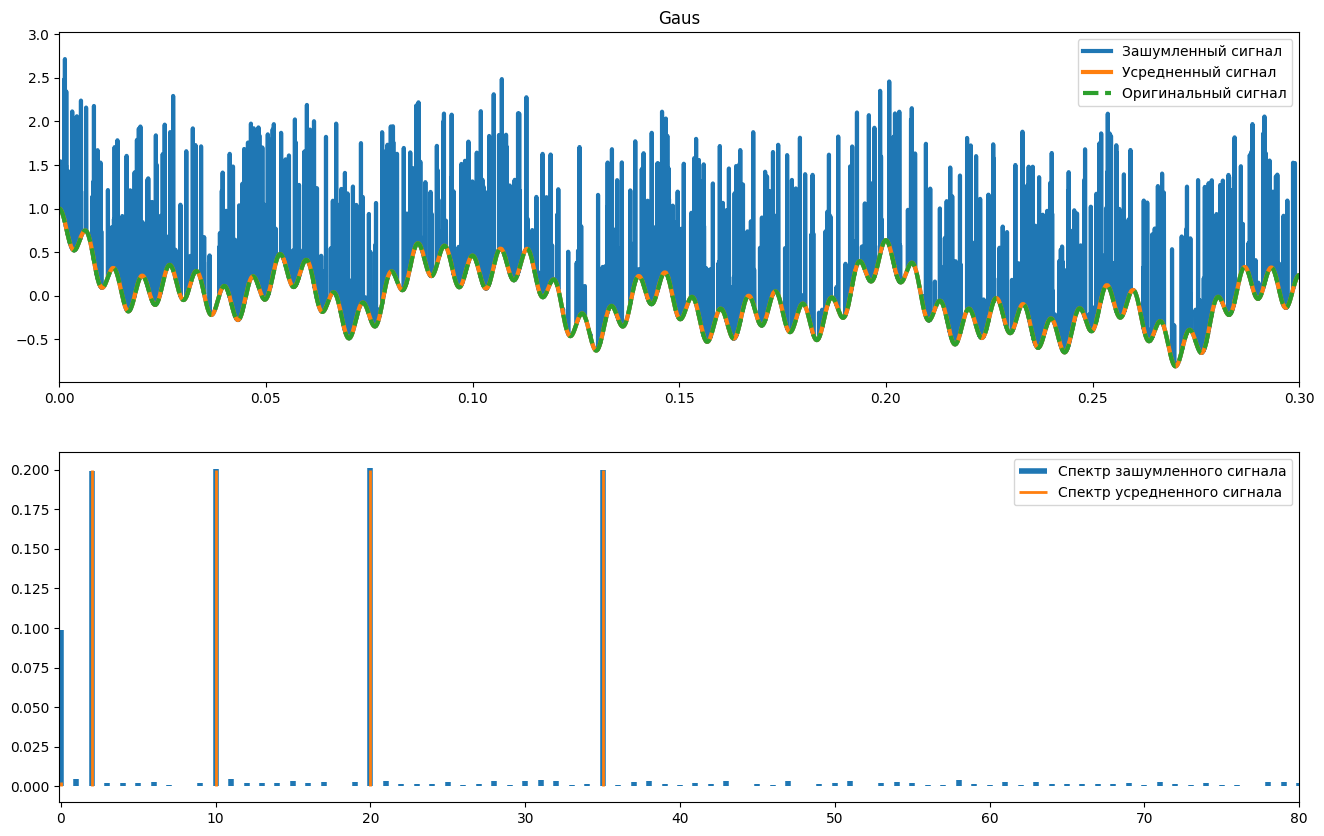

In [15]:
# Вывод результатов
plt.figure(figsize=(16, 10))

plt.subplot(2, 1, 1)
plt.title("Gaus")
plt.plot(t, y_spiked4, linewidth=3,label='Зашумленный сигнал')
plt.plot(t, y_smoothed4, linewidth=3, label='Усредненный сигнал')
plt.plot(t, y, linewidth=3, linestyle='--', label='Оригинальный сигнал')
plt.xlim(0, 0.3)
plt.legend()

plt.subplot(2, 1, 2)
plt.vlines(freq, 0, np.abs(yff_signal4) / num * 2, label='Спектр зашумленного сигнала', linewidth=4, color='C0')
plt.vlines(freq, 0, np.abs(yff_smoothed4) / num * 2, label='Спектр усредненного сигнала', linewidth=2, color='C1')
plt.xlim(-0.1, 80)
plt.legend()

plt.show()

5. Метод спектральной интерполяции сигналов.
Данный метод позволяет восстановить часть сигнала, которая была потеряна или удалена.

Алгоритм реализации метода:
- определить сигнал в заданном временном промежутке, например от 0 до 10 сек.
- удалить из сигнала данные в диапазоне от 5 до 7 секунд.
- задать размер окна по временной области для которых будет определяться спектр. Размер окон
для правой и левой части должны совпадать.
- определить спектр сигнала до разрыва и после разрыва.
- осуществить усреднение спектров сигналов в правой и левой области.
- с помощью обратного преобразования Фурье восстановить утерянную часть сигнала.
- сшить границы с помощью линейной интерполяции.

In [17]:
num2 = 50000  # количество отсчетов

# создание сигнала
t2 = np.linspace(0, 10, num2)
y2 = cos_signal(t2, [2, 10, 20, 35, 80], A=0.2)

# fft
freq2 = rfftfreq(len(t2), d=(t2[1]-t2[0]))
yff_signal2 = rfft(y2)

y2_croped = y2.copy()
y2_croped[(5 < t2) & (t2 < 7)] = np.nan

In [18]:
window_size = 2

# определить спектр сигнала до разрыва и после разрыва
left = y2_croped[t2 <= window_size]
right = y2_croped[t2 >= 10-window_size]
yff_signal2_left = rfft(left)
yff_signal2_right = rfft(right)

freq2_part = rfftfreq(len(left), d=(t2[1]-t2[0]))

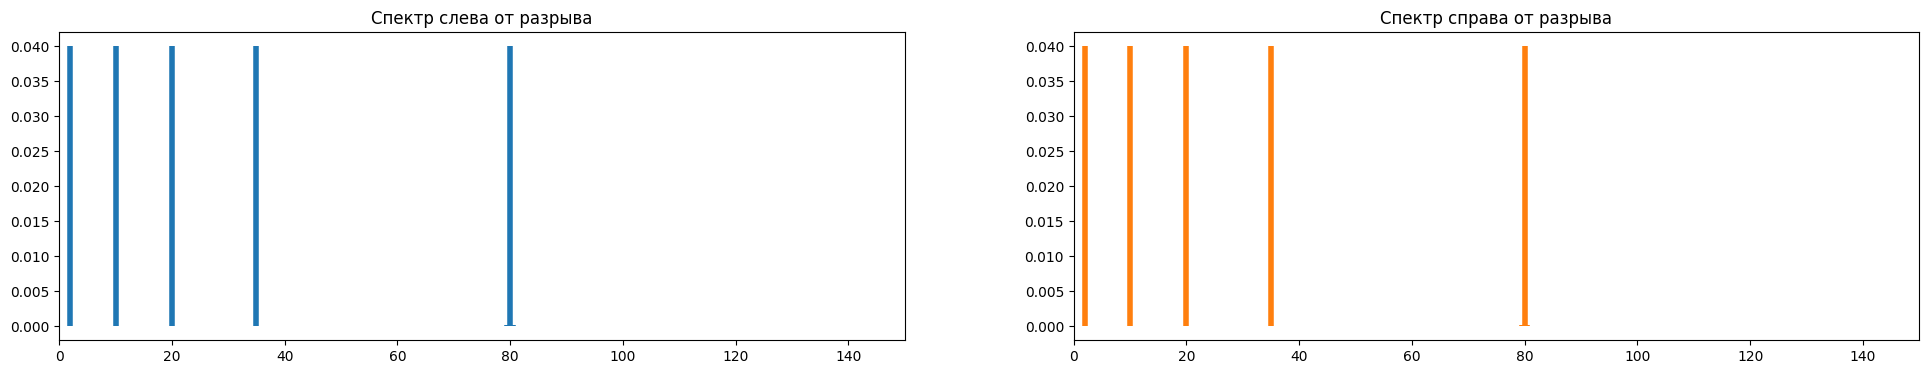

In [19]:
# Вывод результатов
plt.figure(figsize=(24, 4))

plt.subplot(1, 2, 1)
plt.title("Спектр слева от разрыва")
plt.vlines(freq2_part, 0, np.abs(yff_signal2_left) / num2 * 2, label='Спектр слева', linewidth=4, color='C0')
plt.xlim(0, 150)

plt.subplot(1, 2, 2)
plt.title("Спектр справа от разрыва")
plt.vlines(freq2_part, 0, np.abs(yff_signal2_right) / num2 * 2, label='Спектр справа', linewidth=4, color='C1')
plt.xlim(0, 150)

plt.show()

In [20]:
# осуществить усреднение спектров сигналов в правой и левой области
yff_signal2_mean = (yff_signal2_left + yff_signal2_right) / 2

# с помощью обратного преобразования Фурье восстановить утерянную часть сигнала
y2_restored_part = irfft(yff_signal2_mean)

# изменить размер восстановленной части сигнала, чтобы он соответствовал исходному сигналу
y2_restored_part_resized = np.interp(np.linspace(5, 7, int(num2 * 2 / 10)), np.linspace(5, 7, len(y2_restored_part)), y2_restored_part)

# сшить границы
y2_restored = np.concatenate((y2_croped[t2 <= 5], y2_restored_part_resized, y2_croped[t2 >= 7]))

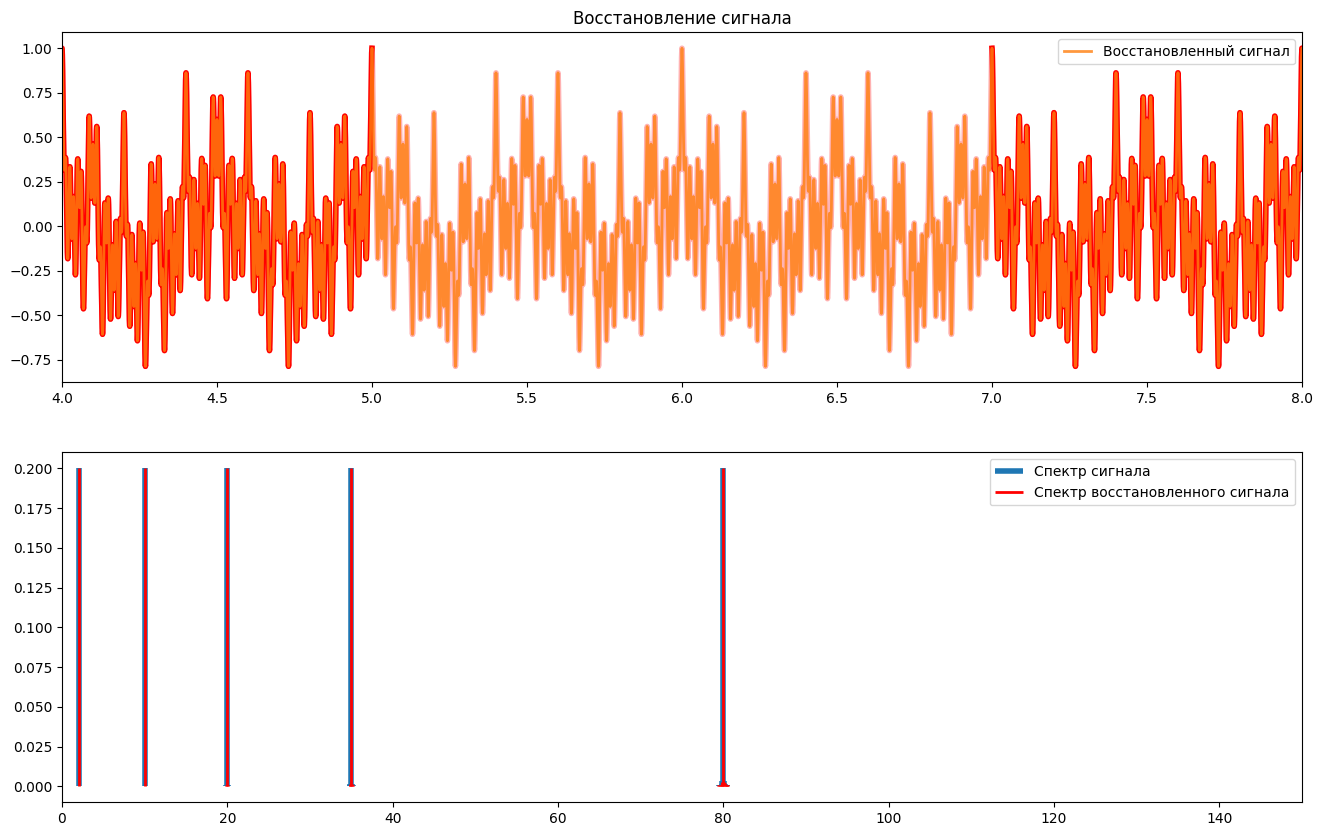

In [30]:
# Вывод результатов
plt.figure(figsize=(16, 10))

plt.subplot(2, 1, 1)
plt.title("Восстановление сигнала")
plt.plot(t2, y2, linewidth=4, alpha=0.3, color='red')
plt.plot(t2, y2_croped, linewidth=4, color='red')
plt.plot(t2, y2_restored, linewidth=2, alpha=0.8, label='Восстановленный сигнал', color='C1')
plt.xlim(4, 8)
plt.legend()

plt.subplot(2, 1, 2)
plt.vlines(freq2, 0, np.abs(yff_signal2) / num2 * 2, label='Спектр сигнала', linewidth=4, color='C0')
plt.vlines(freq2, 0, np.abs(rfft(y2_restored)) / num2 * 2, label='Спектр восстановленного сигнала', linewidth=2, color='red')
plt.xlim(0, 150)
plt.legend()

plt.show()